<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set 1 (Life Expectancy data)

The dataset contains information about several health and economic factors that contribute to average life expectancy for different countries. <br> Attribute information: 

**Country:** Name of the country

**Status:** Whether the country is Developed or Developing

**Adult_Mortality:** Mortality rate for age group 15-60 out of every 1000 individuals of the population

**Infant_Deaths:** Number of infant deaths per 1000 population

**Hepatitis:** Hepatitis B (HepB) immunization coverage for 1 year olds (Percentage)

**Measles:** Number of reported cases for measles per 1000 from population

**BMI:** Average Body Mass Index for entire population

**Underfive_Deaths:** Number of deaths under 5 years of age per 1000 population

**Polio:** Polio (Pol3) immunization coverage for 1 year olds (Percentage)

**Diphtheria:** Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage for 1 year olds (Percentage)

**HIV:** Deaths per 1000 live births due to HIV/AIDS (0-4 years)

**GDP:** Gross Domestic Product per capita (in USD)

**Population:** Population of the country

**Malnourished10_19:** Prevalence of malnutrition among children and adolescents for Age 10 to 19 (Percentage)

**Malnourished5_9:** Prevalence of malnutrition among children for Age 5 to 9 (Percentage)

**Income_Index:** Human Development Index (HDI) in terms of national income per capita (index ranging from 0 to 1)

**Schooling:** Number of years of Schooling

**Life_Expectancy:** Life Expectancy in age for the country





## Table of Content

1. **[Bivariate Regression](#Bivariate)**
2. **[Multiple Linear Regression (MLR)](#MLR)**
3. **[Inferences about slope](#ins)**
4. **[Model Evaluation](#ML_eval)**
5. **[Assumptions of Linear Regression](#assum)**
6. **[Model Performance](#ml_perf)**

**Import the required libraries**

In [1]:
# type your code here
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

#### Load the first dataset and check the first five observations

Load the csv file and set the first column as index

In [29]:
# load the csv file
data=pd.read_csv('Life_Expectancy.csv')
data
# type your code here

,Country,Status,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
0,Afghanistan,Developing,263,62,65,1154,19.1,83,6,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1,65.0
1,Albania,Developing,8,0,98,0,57.2,1,98,98,0.1,4575.763787,288914,1.2,1.3,0.761,14.2,77.5
2,Algeria,Developing,19,21,95,63,59.5,24,95,95,0.1,4132.762920,39871528,6.0,5.8,0.743,14.4,75.6
3,Angola,Developing,335,66,64,118,23.3,98,7,64,1.9,3695.793748,2785935,8.3,8.2,0.531,11.4,52.4
4,Argentina,Developing,116,8,94,0,62.8,9,93,94,0.1,13467.123600,43417765,1.0,0.9,0.826,17.3,76.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,Venezuela,Developing,37,24,95,129,15.4,38,95,95,7.1,287.931877,8991735,6.8,7.0,0.388,8.8,55.3
120,Viet Nam,Developing,397,26,89,386,14.9,42,89,89,7.7,236.911438,8818438,6.9,7.1,0.371,8.2,53.4
121,Yemen,Developing,48,29,96,1064,14.5,46,96,96,8.1,212.661949,868346,7.0,7.3,0.359,7.6,52.0
122,Zambia,Developing,415,31,88,2738,14.1,50,85,88,8.0,196.597780,853625,7.2,7.4,0.343,7.2,57.0


In [30]:
data.isna().sum()

Country               0
Status                0
Adult_Mortality       0
Infant_Deaths         0
Hepatitis             0
Measles               0
 BMI                  0
Underfive_Deaths      0
Polio                 0
Diphtheria            0
 HIV                  0
GDP                   0
Population            0
Malnourished10_19     0
Malnourished5_9       0
Income_Index          0
Schooling             0
Expected              0
dtype: int64

In [31]:
data.columns=data.columns.str.replace(' ','')

In [32]:
data.columns

Index(['Country', 'Status', 'Adult_Mortality', 'Infant_Deaths', 'Hepatitis',
       'Measles', 'BMI', 'Underfive_Deaths', 'Polio', 'Diphtheria', 'HIV',
       'GDP', 'Population', 'Malnourished10_19', 'Malnourished5_9',
       'Income_Index', 'Schooling', 'Expected'],
      dtype='object')

### Let's begin with some hands-on practice exercises

<a id="Bivariate"> </a>
## 1. Bivariate Regression

## We shall use the life expectancy dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. How do we analyze the impact of adult mortality rate on average life expectancy of a country?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [3]:
# type your code here

In [49]:
x=data['Adult_Mortality']
y=data['Expected']

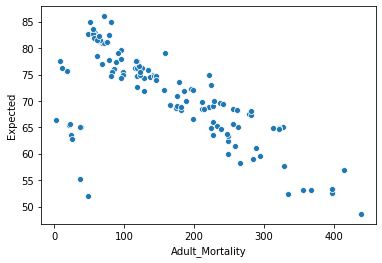

In [50]:
sns.scatterplot(x,y)
plt.show()

In [51]:
data[['Adult_Mortality','Expected']].corr()

,Adult_Mortality,Expected
Adult_Mortality,1.000000,-0.710868
Expected,-0.710868,1.000000


In [52]:
import statsmodels.api as sm

In [53]:
xc1=sm.add_constant(x)
xc1

,const,Adult_Mortality
0,1.0,263
1,1.0,8
2,1.0,19
3,1.0,335
4,1.0,116
...,...,...
119,1.0,37
120,1.0,397
121,1.0,48
122,1.0,415


In [54]:
ols=sm.OLS(y,xc1)
ols_model=ols.fit()
ols_model

In [55]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     124.6
Date:                Tue, 08 Dec 2020   Prob (F-statistic):           2.27e-20
Time:                        17:01:08   Log-Likelihood:                -396.71
No. Observations:                 124   AIC:                             797.4
Df Residuals:                     122   BIC:                             803.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              80.7106      1.005     80.272      0.000      78.720      82.701
Adult_Mortality    -0.0591      0.005    -11.164      0.000      -0.070      -0.049
==============================================================================
Omnibus:                       57.611   Durbin-Watson:                   1.624
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.621
Skew:                          -1.821   Prob(JB):                     1.32e-35
Kurtosis:                       7.222   Cond. No.                         355.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
ols_model.summary()

#without xc1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Expected   R-squared (uncentered):                   0.632
Model:                            OLS   Adj. R-squared (uncentered):              0.629
Method:                 Least Squares   F-statistic:                              211.1
Date:                Tue, 08 Dec 2020   Prob (F-statistic):                    1.83e-28
Time:                        16:52:23   Log-Likelihood:                         -643.81
No. Observations:                 124   AIC:                                      1290.
Df Residuals:                     123   BIC:                                      1292.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Adult_Mortality     0.3003      0.021     14.530      0.000       0.259       0.341
==============================================================================
Omnibus:                        9.872   Durbin-Watson:                   1.154
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.718
Skew:                          -0.704   Prob(JB):                      0.00471
Kurtosis:                       2.693   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. A regression model is built to check the impact of Human Development Index (Income) on the life expectancy of a nation. What is the expected error value?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [56]:
# type your code here
x=data['Income_Index']
y=data['Expected']


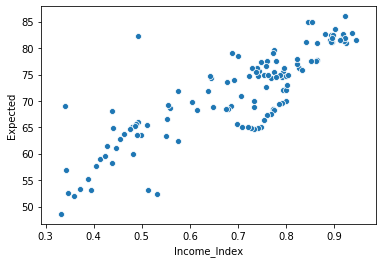

In [79]:
sns.scatterplot(x,y)
plt.show()

In [57]:
xc2=sm.add_constant(x)
xc2

,const,Income_Index
0,1.0,0.479
1,1.0,0.761
2,1.0,0.743
3,1.0,0.531
4,1.0,0.826
...,...,...
119,1.0,0.388
120,1.0,0.371
121,1.0,0.359
122,1.0,0.343


In [58]:
ols= sm.OLS(y,xc2)
ols_model= ols.fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     300.0
Date:                Tue, 08 Dec 2020   Prob (F-statistic):           1.13e-34
Time:                        17:06:50   Log-Likelihood:                -363.40
No. Observations:                 124   AIC:                             730.8
Df Residuals:                     122   BIC:                             736.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           41.9191      1.741     24.081      0.000      38.473      45.365
Income_Index    42.4243      2.449     17.322      0.000      37.576      47.273
==============================================================================
Omnibus:                       11.870   Durbin-Watson:                   1.355
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               26.475
Skew:                           0.280   Prob(JB):                     1.78e-06
Kurtosis:                       5.193   Cond. No.                         8.87
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
x=data['Income_Index']
y=data['Expected']

b1 = np.sum((x-x.mean())*(y-y.mean())) / np.sum((x-x.mean())**2)
b0=y.mean() - b1*x.mean()
yreg=b1*x+b0
yreg

0      62.240363
1      74.204011
2      73.440374
3      64.446426
4      76.961589
         ...    
119    58.379753
120    57.658540
121    57.149449
122    56.470660
123    56.003993
Name: Income_Index, Length: 124, dtype: float64

In [74]:
sse =  np.sum((y- yreg)**2)
sse

2549.584803454099

In [75]:
mse=np.mean((y- yreg)**2)
mse

20.561167769791123

In [76]:
rmse=np.sqrt(mse)
rmse

4.534442387966918

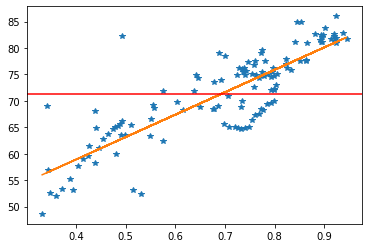

In [77]:
plt.plot(x,y,"*")
plt.plot(x,b1*x+b0)
plt.axhline(y.mean(),color='r')

<a id="MLR"> </a>
## 2. Multiple Linear Regression(MLR)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Analyze the impact of immunization on life expectancy. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             124 non-null    object 
 1   Status              124 non-null    object 
 2   Adult_Mortality     124 non-null    int64  
 3   Infant_Deaths       124 non-null    int64  
 4   Hepatitis           124 non-null    int64  
 5   Measles             124 non-null    int64  
 6    BMI                124 non-null    float64
 7   Underfive_Deaths    124 non-null    int64  
 8   Polio               124 non-null    int64  
 9   Diphtheria          124 non-null    int64  
 10   HIV                124 non-null    float64
 11  GDP                 124 non-null    float64
 12  Population          124 non-null    int64  
 13  Malnourished10_19   124 non-null    float64
 14  Malnourished5_9     124 non-null    float64
 15  Income_Index        124 non-null    float64
 16  Schoolin

In [89]:
# type your code here


# Build Linear reression model.

#Hepatitis,Polio,diphtheria covers the immunization coverage count.

inp=data[['Hepatitis','Polio','Diphtheria']]
out=data['Expected']

inpc=sm.add_constant(inp)

ols=sm.OLS(out,inpc)
ols_mod=ols.fit()
ols_mod.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     6.395
Date:                Tue, 08 Dec 2020   Prob (F-statistic):           0.000468
Time:                        21:06:45   Log-Likelihood:                -431.15
No. Observations:                 124   AIC:                             870.3
Df Residuals:                     120   BIC:                             881.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.9881      3.524     16.453      0.000      51.010      64.966
Hepatitis     -0.1037      0.068     -1.528      0.129      -0.238       0.031
Polio          0.0910      0.043      2.099      0.038       0.005       0.177
Diphtheria     0.1613      0.082      1.969      0.051      -0.001       0.323
==============================================================================
Omnibus:                        4.513   Durbin-Watson:                   1.000
Prob(Omnibus):                  0.105   Jarque-Bera (JB):                4.279
Skew:                          -0.396   Prob(JB):                        0.118
Kurtosis:                       2.550   Cond. No.                         755.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
data.columns

Index(['Country', 'Status', 'Adult_Mortality', 'Infant_Deaths', 'Hepatitis',
       'Measles', 'BMI', 'Underfive_Deaths', 'Polio', 'Diphtheria', 'HIV',
       'GDP', 'Population', 'Malnourished10_19', 'Malnourished5_9',
       'Income_Index', 'Schooling', 'Expected'],
      dtype='object')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. If the information that whether the country is a developed or a developing country is included, does it alter the impact of immunzation on life expectancy ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [34]:
data['Status'].value_counts()

Developing    105
Developed      19
Name: Status, dtype: int64

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
LE=LabelEncoder()

In [37]:
data['Status']=LE.fit_transform(data['Status'])

In [38]:
data['Status']

0      1
1      1
2      1
3      1
4      1
      ..
119    1
120    1
121    1
122    1
123    1
Name: Status, Length: 124, dtype: int32

In [39]:
inp=data[['Hepatitis','Polio','Diphtheria']]
out=data['Expected']

inpc=sm.add_constant(inp)

ols=sm.OLS(out,inpc)
ols_mod=ols.fit()
ols_mod.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     6.395
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           0.000468
Time:                        17:53:01   Log-Likelihood:                -431.15
No. Observations:                 124   AIC:                             870.3
Df Residuals:                     120   BIC:                             881.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.9881      3.524     16.453      0.000      51.010      64.966
Hepatitis     -0.1037      0.068     -1.528      0.129      -0.238       0.031
Polio          0.0910      0.043      2.099      0.038       0.005       0.177
Diphtheria     0.1613      0.082      1.969      0.051      -0.001       0.323
==============================================================================
Omnibus:                        4.513   Durbin-Watson:                   1.000
Prob(Omnibus):                  0.105   Jarque-Bera (JB):                4.279
Skew:                          -0.396   Prob(JB):                        0.118
Kurtosis:                       2.550   Cond. No.                         755.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             124 non-null    object 
 1   Status              124 non-null    object 
 2   Adult_Mortality     124 non-null    int64  
 3   Infant_Deaths       124 non-null    int64  
 4   Hepatitis           124 non-null    int64  
 5   Measles             124 non-null    int64  
 6    BMI                124 non-null    float64
 7   Underfive_Deaths    124 non-null    int64  
 8   Polio               124 non-null    int64  
 9   Diphtheria          124 non-null    int64  
 10   HIV                124 non-null    float64
 11  GDP                 124 non-null    float64
 12  Population          124 non-null    int64  
 13  Malnourished10_19   124 non-null    float64
 14  Malnourished5_9     124 non-null    float64
 15  Income_Index        124 non-null    float64
 16  Schoolin

In [67]:
data['Status']

0      1
1      1
2      1
3      1
4      1
      ..
119    1
120    1
121    1
122    1
123    1
Name: Status, Length: 124, dtype: int32

In [69]:
inp=data[['Hepatitis','Polio','Diphtheria','Status']]
out=data['Expected']

inpc=sm.add_constant(inp)

ols=sm.OLS(out,inpc)
ols_mod=ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     14.06
Date:                Tue, 08 Dec 2020   Prob (F-statistic):           2.00e-09
Time:                        17:22:20   Log-Likelihood:                -416.35
No. Observations:                 124   AIC:                             842.7
Df Residuals:                     119   BIC:                             856.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          69.8090      3.771     18.512      0.000      62.342      77.276
Hepatitis      -0.0035      0.063     -0.056      0.955      -0.128       0.121
Polio           0.0771      0.039      1.993      0.049       0.000       0.154
Diphtheria      0.0456      0.076      0.602      0.548      -0.104       0.196
Status        -10.6036      1.872     -5.664      0.000     -14.310      -6.897
==============================================================================
Omnibus:                        2.973   Durbin-Watson:                   1.211
Prob(Omnibus):                  0.226   Jarque-Bera (JB):                2.635
Skew:                          -0.355   Prob(JB):                        0.268
Kurtosis:                       3.077   Cond. No.                         946.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<a id="ins"> </a>
## 3. Inferences about slope

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Find the significant variables in the full model when all the variables are considered for prediction of life expectancy.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
# type your code here

In [40]:
data1=data.set_index('Country')
data1.head()

,Status,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
Country,,,,,,,,,,,,,,,,,
Afghanistan,1,263,62,65,1154,19.1,83,6,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1,65.0
Albania,1,8,0,98,0,57.2,1,98,98,0.1,4575.763787,288914,1.2,1.3,0.761,14.2,77.5
Algeria,1,19,21,95,63,59.5,24,95,95,0.1,4132.762920,39871528,6.0,5.8,0.743,14.4,75.6
Angola,1,335,66,64,118,23.3,98,7,64,1.9,3695.793748,2785935,8.3,8.2,0.531,11.4,52.4
Argentina,1,116,8,94,0,62.8,9,93,94,0.1,13467.123600,43417765,1.0,0.9,0.826,17.3,76.3


In [41]:
data1.columns

Index(['Status', 'Adult_Mortality', 'Infant_Deaths', 'Hepatitis', 'Measles',
       'BMI', 'Underfive_Deaths', 'Polio', 'Diphtheria', 'HIV', 'GDP',
       'Population', 'Malnourished10_19', 'Malnourished5_9', 'Income_Index',
       'Schooling', 'Expected'],
      dtype='object')

In [42]:
import statsmodels.api as sm

In [43]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124 entries, Afghanistan to Zimbabwe
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Status             124 non-null    int32  
 1   Adult_Mortality    124 non-null    int64  
 2   Infant_Deaths      124 non-null    int64  
 3   Hepatitis          124 non-null    int64  
 4   Measles            124 non-null    int64  
 5   BMI                124 non-null    float64
 6   Underfive_Deaths   124 non-null    int64  
 7   Polio              124 non-null    int64  
 8   Diphtheria         124 non-null    int64  
 9   HIV                124 non-null    float64
 10  GDP                124 non-null    float64
 11  Population         124 non-null    int64  
 12  Malnourished10_19  124 non-null    float64
 13  Malnourished5_9    124 non-null    float64
 14  Income_Index       124 non-null    float64
 15  Schooling          124 non-null    float64
 16  Expected        

In [44]:
out=data1['Expected']
inp=data1.drop('Expected',axis=1)

In [45]:
inpc=sm.add_constant(inp)
ols=sm.OLS(out,inpc)
ols_mod=ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     37.43
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           1.94e-36
Time:                        17:53:37   Log-Likelihood:                -323.38
No. Observations:                 124   AIC:                             680.8
Df Residuals:                     107   BIC:                             728.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                60.0678      3.747     16.030      0.000      52.639      67.496
Status               -2.0360      1.168     -1.743      0.084      -4.352       0.280
Adult_Mortality      -0.0231      0.004     -5.685      0.000      -0.031      -0.015
Infant_Deaths         0.0556      0.037      1.507      0.135      -0.018       0.129
Hepatitis             0.0656      0.032      2.056      0.042       0.002       0.129
Measles            -5.93e-05   6.09e-05     -0.974      0.332      -0.000    6.14e-05
BMI                  -0.0266      0.023     -1.179      0.241      -0.071       0.018
Underfive_Deaths     -0.0389      0.027     -1.439      0.153      -0.093       0.015
Polio                -0.0091      0.022     -0.417      0.677      -0.053       0.034
Diphtheria           -0.0345      0.040     -0.868      0.387      -0.113       0.044
HIV                  -1.0385      0.268     -3.881      0.000      -1.569      -0.508
GDP                5.021e-05   3.48e-05      1.445      0.151   -1.87e-05       0.000
Population        -1.845e-08    8.6e-09     -2.146      0.034   -3.55e-08   -1.41e-09
Malnourished10_19    -0.4850      0.300     -1.616      0.109      -1.080       0.110
Malnourished5_9       0.2983      0.283      1.053      0.294      -0.263       0.860
Income_Index         18.6518      6.313      2.955      0.004       6.138      31.166
Schooling             0.3599      0.346      1.040      0.301      -0.326       1.046
==============================================================================
Omnibus:                        6.529   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.038   Jarque-Bera (JB):               10.518
Skew:                           0.122   Prob(JB):                      0.00520
Kurtosis:                       4.406   Cond. No.                     9.15e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
ols_mod.pvalues[ols_mod.pvalues<0.05][1:]

Adult_Mortality    1.144620e-07
Hepatitis          4.216878e-02
HIV                1.803409e-04
Population         3.409536e-02
Income_Index       3.849778e-03
dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. If economic indices are used to predict the life expectancy, calculate the total variation for the observed values of life expectancy.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
# type your code here

# If economic indices are used to predict the life expectancy, 
# calculate the total variation for the observed values of life expectancy

# calculate => ssr,sse
#then compute sst=ssr+sse

#sst can be done like this also np.sum((out - out.mean())**2)

# ip=data['gdp, income index'] #only these two talk about economic indices so we use it
# op=data['life expectancy']

In [17]:
data.columns

Index(['Country', 'Status', 'Adult_Mortality', 'Infant_Deaths', 'Hepatitis',
       'Measles', 'BMI', 'Underfive_Deaths', 'Polio', 'Diphtheria', 'HIV',
       'GDP', 'Population', 'Malnourished10_19', 'Malnourished5_9',
       'Income_Index', 'Schooling', 'Expected'],
      dtype='object')

In [39]:
ip=data[['GDP','Income_Index']] 
op=data['Expected']

In [44]:
xc=sm.add_constant(ip)
xc

,const,GDP,Income_Index
0,1.0,584.259210,0.479
1,1.0,4575.763787,0.761
2,1.0,4132.762920,0.743
3,1.0,3695.793748,0.531
4,1.0,13467.123600,0.826
...,...,...,...
119,1.0,287.931877,0.388
120,1.0,236.911438,0.371
121,1.0,212.661949,0.359
122,1.0,196.597780,0.343


In [46]:
ols=sm.OLS(op,xc)
ols_mod=ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     150.6
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           1.44e-33
Time:                        14:59:19   Log-Likelihood:                -362.85
No. Observations:                 124   AIC:                             731.7
Df Residuals:                     121   BIC:                             740.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           42.6132      1.865     22.848      0.000      38.921      46.306
GDP           4.515e-05   4.36e-05      1.034      0.303   -4.13e-05       0.000
Income_Index    40.9705      2.823     14.512      0.000      35.381      46.560
==============================================================================
Omnibus:                        9.157   Durbin-Watson:                   1.349
Prob(Omnibus):                  0.010   Jarque-Bera (JB):               16.954
Skew:                           0.232   Prob(JB):                     0.000208
Kurtosis:                       4.751   Cond. No.                     1.05e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
ypred=ols_mod.predict(xc)

In [48]:
residue=op-ypred
residue

0       2.735571
1       3.501660
2       2.359132
3     -12.135391
4      -0.762897
         ...    
119    -3.222734
120    -4.423931
121    -5.331190
122     0.325063
123    -7.616358
Length: 124, dtype: float64

In [50]:
ssr=np.sum((op.mean() - ypred)**2)
ssr

6292.571603999805

In [51]:
sse=np.sum((op-ypred)**2)
sse

2527.2338798711353

In [52]:
sst=sse+ssr
sst

8819.80548387094

In [ ]:
sst= np.sum((op - op.mean())**2)
sst

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Determine the lower bound and upper bound for estimated value of life expectancy per unit change in HDI (for income)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [9]:
# type your code here

#CI for HDI is asked.
#from ols report print the CI of HDI

In [55]:
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     150.6
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           1.44e-33
Time:                        15:10:21   Log-Likelihood:                -362.85
No. Observations:                 124   AIC:                             731.7
Df Residuals:                     121   BIC:                             740.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           42.6132      1.865     22.848      0.000      38.921      46.306
GDP           4.515e-05   4.36e-05      1.034      0.303   -4.13e-05       0.000
Income_Index    40.9705      2.823     14.512      0.000      35.381      46.560
==============================================================================
Omnibus:                        9.157   Durbin-Watson:                   1.349
Prob(Omnibus):                  0.010   Jarque-Bera (JB):               16.954
Skew:                           0.232   Prob(JB):                     0.000208
Kurtosis:                       4.751   Cond. No.                     1.05e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
ols_mod.conf_int()[1:]

,0,1
Adult_Mortality,-4.948184e-02,-2.898888e-02
Infant_Deaths,-5.761288e-02,1.112210e-01
Underfive_Deaths,-9.300904e-02,3.811942e-02
HIV,-2.706016e+00,-1.521235e+00
Population,-3.138319e-08,1.300337e-08


<a id="ML_eval"> </a>
## 4. Model Evaluation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. A model is built to analyze the impact of mortality on Life expectancy. Would the addition of information about population of the country lead to a better prediction?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

# Model 1

In [58]:
data.columns

Index(['Country', 'Status', 'Adult_Mortality', 'Infant_Deaths', 'Hepatitis',
       'Measles', 'BMI', 'Underfive_Deaths', 'Polio', 'Diphtheria', 'HIV',
       'GDP', 'Population', 'Malnourished10_19', 'Malnourished5_9',
       'Income_Index', 'Schooling', 'Expected'],
      dtype='object')

In [60]:
model1_inp=data[['Adult_Mortality','Infant_Deaths','Underfive_Deaths','HIV']]
model1_op=data['Expected']

In [62]:
model1_inpc=sm.add_constant(model1_inp)

In [66]:
ols=sm.OLS(model1_op,model1_inpc)
ols_mod=ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     60.00
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           1.20e-27
Time:                        15:42:32   Log-Likelihood:                -371.89
No. Observations:                 124   AIC:                             753.8
Df Residuals:                     119   BIC:                             767.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               79.6070      0.854     93.252      0.000      77.917      81.297
Adult_Mortality     -0.0400      0.005     -7.882      0.000      -0.050      -0.030
Infant_Deaths        0.0245      0.042      0.576      0.566      -0.060       0.109
Underfive_Deaths    -0.0256      0.033     -0.777      0.439      -0.091       0.040
HIV                 -2.0705      0.294     -7.041      0.000      -2.653      -1.488
==============================================================================
Omnibus:                       11.940   Durbin-Watson:                   1.673
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.431
Skew:                          -0.705   Prob(JB):                      0.00200
Kurtosis:                       3.648   Cond. No.                         396.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
ols_mod.rsquared

0.6703895220880756

# Model 2

In [67]:
model2_inp=data[['Adult_Mortality','Infant_Deaths','Underfive_Deaths','HIV','Population']]
model2_op=data['Expected']

In [68]:
model2_inpc=sm.add_constant(model2_inp)

In [69]:
ols=sm.OLS(model2_op,model2_inpc)
ols_mod=ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     48.00
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           7.13e-27
Time:                        15:43:35   Log-Likelihood:                -371.54
No. Observations:                 124   AIC:                             755.1
Df Residuals:                     118   BIC:                             772.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               79.6984      0.862     92.447      0.000      77.991      81.406
Adult_Mortality     -0.0392      0.005     -7.583      0.000      -0.049      -0.029
Infant_Deaths        0.0268      0.043      0.629      0.531      -0.058       0.111
Underfive_Deaths    -0.0274      0.033     -0.829      0.409      -0.093       0.038
HIV                 -2.1136      0.299     -7.066      0.000      -2.706      -1.521
Population        -9.19e-09   1.12e-08     -0.820      0.414   -3.14e-08     1.3e-08
==============================================================================
Omnibus:                       11.447   Durbin-Watson:                   1.678
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.780
Skew:                          -0.695   Prob(JB):                      0.00277
Kurtosis:                       3.588   Cond. No.                     8.77e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.77e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
ols_mod.rsquared

0.6703895220880756

In [76]:
ols_mod.pvalues

const               6.054277e-112
Adult_Mortality      8.495182e-12
Infant_Deaths        5.307109e-01
Underfive_Deaths     4.088173e-01
HIV                  1.202388e-10
Population           4.138684e-01
dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Fit a full model and test the significance of the overall model. <br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [11]:
# type your code here


In [83]:
out=data1['Expected']
inp=data1.drop('Expected',axis=1)

In [84]:
inp_c=sm.add_constant(inp)

In [85]:
ols=sm.OLS(out,inp_c)
ols_mod=ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     37.43
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           1.94e-36
Time:                        16:11:22   Log-Likelihood:                -323.38
No. Observations:                 124   AIC:                             680.8
Df Residuals:                     107   BIC:                             728.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                60.0678      3.747     16.030      0.000      52.639      67.496
Status               -2.0360      1.168     -1.743      0.084      -4.352       0.280
Adult_Mortality      -0.0231      0.004     -5.685      0.000      -0.031      -0.015
Infant_Deaths         0.0556      0.037      1.507      0.135      -0.018       0.129
Hepatitis             0.0656      0.032      2.056      0.042       0.002       0.129
Measles            -5.93e-05   6.09e-05     -0.974      0.332      -0.000    6.14e-05
BMI                  -0.0266      0.023     -1.179      0.241      -0.071       0.018
Underfive_Deaths     -0.0389      0.027     -1.439      0.153      -0.093       0.015
Polio                -0.0091      0.022     -0.417      0.677      -0.053       0.034
Diphtheria           -0.0345      0.040     -0.868      0.387      -0.113       0.044
HIV                  -1.0385      0.268     -3.881      0.000      -1.569      -0.508
GDP                5.021e-05   3.48e-05      1.445      0.151   -1.87e-05       0.000
Population        -1.845e-08    8.6e-09     -2.146      0.034   -3.55e-08   -1.41e-09
Malnourished10_19    -0.4850      0.300     -1.616      0.109      -1.080       0.110
Malnourished5_9       0.2983      0.283      1.053      0.294      -0.263       0.860
Income_Index         18.6518      6.313      2.955      0.004       6.138      31.166
Schooling             0.3599      0.346      1.040      0.301      -0.326       1.046
==============================================================================
Omnibus:                        6.529   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.038   Jarque-Bera (JB):               10.518
Skew:                           0.122   Prob(JB):                      0.00520
Kurtosis:                       4.406   Cond. No.                     9.15e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<a id="assum"> </a>
## 4. Assumptions of Linear Regression

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. A model is built using all the features (full model) to predict the life expectancy. Check whether the residuals obtained form the model follow a normal distribution.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
# type your code here

In [47]:
data1.columns

Index(['Status', 'Adult_Mortality', 'Infant_Deaths', 'Hepatitis', 'Measles',
       'BMI', 'Underfive_Deaths', 'Polio', 'Diphtheria', 'HIV', 'GDP',
       'Population', 'Malnourished10_19', 'Malnourished5_9', 'Income_Index',
       'Schooling', 'Expected'],
      dtype='object')

In [48]:
y=data1['Expected']
x=data1.drop('Expected',axis=1)

In [49]:
x

,Status,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling
Country,,,,,,,,,,,,,,,,
Afghanistan,1,263,62,65,1154,19.1,83,6,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1
Albania,1,8,0,98,0,57.2,1,98,98,0.1,4575.763787,288914,1.2,1.3,0.761,14.2
Algeria,1,19,21,95,63,59.5,24,95,95,0.1,4132.762920,39871528,6.0,5.8,0.743,14.4
Angola,1,335,66,64,118,23.3,98,7,64,1.9,3695.793748,2785935,8.3,8.2,0.531,11.4
Argentina,1,116,8,94,0,62.8,9,93,94,0.1,13467.123600,43417765,1.0,0.9,0.826,17.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,1,37,24,95,129,15.4,38,95,95,7.1,287.931877,8991735,6.8,7.0,0.388,8.8
Viet Nam,1,397,26,89,386,14.9,42,89,89,7.7,236.911438,8818438,6.9,7.1,0.371,8.2
Yemen,1,48,29,96,1064,14.5,46,96,96,8.1,212.661949,868346,7.0,7.3,0.359,7.6


In [50]:
import statsmodels.api as sm

In [51]:
x_c= sm.add_constant(x)


In [52]:
ols=sm.OLS(y,x_c)
ols_mod=ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     37.43
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           1.94e-36
Time:                        17:54:05   Log-Likelihood:                -323.38
No. Observations:                 124   AIC:                             680.8
Df Residuals:                     107   BIC:                             728.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                60.0678      3.747     16.030      0.000      52.639      67.496
Status               -2.0360      1.168     -1.743      0.084      -4.352       0.280
Adult_Mortality      -0.0231      0.004     -5.685      0.000      -0.031      -0.015
Infant_Deaths         0.0556      0.037      1.507      0.135      -0.018       0.129
Hepatitis             0.0656      0.032      2.056      0.042       0.002       0.129
Measles            -5.93e-05   6.09e-05     -0.974      0.332      -0.000    6.14e-05
BMI                  -0.0266      0.023     -1.179      0.241      -0.071       0.018
Underfive_Deaths     -0.0389      0.027     -1.439      0.153      -0.093       0.015
Polio                -0.0091      0.022     -0.417      0.677      -0.053       0.034
Diphtheria           -0.0345      0.040     -0.868      0.387      -0.113       0.044
HIV                  -1.0385      0.268     -3.881      0.000      -1.569      -0.508
GDP                5.021e-05   3.48e-05      1.445      0.151   -1.87e-05       0.000
Population        -1.845e-08    8.6e-09     -2.146      0.034   -3.55e-08   -1.41e-09
Malnourished10_19    -0.4850      0.300     -1.616      0.109      -1.080       0.110
Malnourished5_9       0.2983      0.283      1.053      0.294      -0.263       0.860
Income_Index         18.6518      6.313      2.955      0.004       6.138      31.166
Schooling             0.3599      0.346      1.040      0.301      -0.326       1.046
==============================================================================
Omnibus:                        6.529   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.038   Jarque-Bera (JB):               10.518
Skew:                           0.122   Prob(JB):                      0.00520
Kurtosis:                       4.406   Cond. No.                     9.15e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
y

Country
Afghanistan    65.0
Albania        77.5
Algeria        75.6
Angola         52.4
Argentina      76.3
               ... 
Venezuela      55.3
Viet Nam       53.4
Yemen          52.0
Zambia         57.0
Zimbabwe       48.6
Name: Expected, Length: 124, dtype: float64

In [54]:
ypred=ols_mod.predict(x_c)

In [55]:
residue= y-ypred
residue

Country
Afghanistan    2.741806
Albania       -0.162616
Algeria        0.051908
Angola        -9.643927
Argentina     -0.735077
                 ...   
Venezuela     -5.063265
Viet Nam       2.688189
Yemen         -6.193723
Zambia         7.954199
Zimbabwe       0.164288
Length: 124, dtype: float64

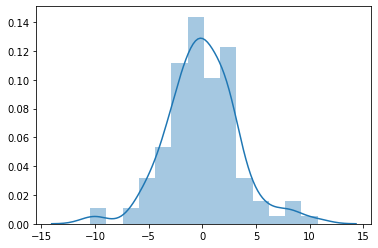

In [56]:
sns.distplot(residue)

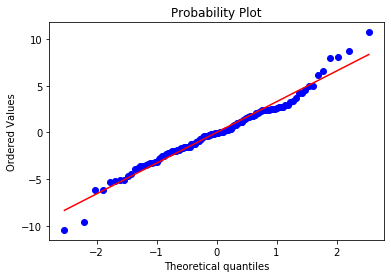

In [57]:
import scipy.stats as stats
stats.probplot(ols_mod.resid,plot=plt)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>11. Does the interaction of status of the country and its GDP have significant effect on life expectancy? (consider the full model)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [59]:
data1['Interaction']=data1['Status']*data1['GDP']

In [60]:
data1

,Status,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected,Interaction
Country,,,,,,,,,,,,,,,,,,
Afghanistan,1,263,62,65,1154,19.1,83,6,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1,65.0,584.259210
Albania,1,8,0,98,0,57.2,1,98,98,0.1,4575.763787,288914,1.2,1.3,0.761,14.2,77.5,4575.763787
Algeria,1,19,21,95,63,59.5,24,95,95,0.1,4132.762920,39871528,6.0,5.8,0.743,14.4,75.6,4132.762920
Angola,1,335,66,64,118,23.3,98,7,64,1.9,3695.793748,2785935,8.3,8.2,0.531,11.4,52.4,3695.793748
Argentina,1,116,8,94,0,62.8,9,93,94,0.1,13467.123600,43417765,1.0,0.9,0.826,17.3,76.3,13467.123600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,1,37,24,95,129,15.4,38,95,95,7.1,287.931877,8991735,6.8,7.0,0.388,8.8,55.3,287.931877
Viet Nam,1,397,26,89,386,14.9,42,89,89,7.7,236.911438,8818438,6.9,7.1,0.371,8.2,53.4,236.911438
Yemen,1,48,29,96,1064,14.5,46,96,96,8.1,212.661949,868346,7.0,7.3,0.359,7.6,52.0,212.661949


In [64]:
y=data1['Expected']
x=data1.drop('Expected',axis=1)

In [65]:
xc=sm.add_constant(x)

In [66]:
ols=sm.OLS(y,xc)
ols_mod=ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     36.30
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           2.14e-36
Time:                        19:48:10   Log-Likelihood:                -321.30
No. Observations:                 124   AIC:                             678.6
Df Residuals:                     106   BIC:                             729.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                62.5466      3.925     15.935      0.000      54.765      70.328
Status               -3.8250      1.489     -2.569      0.012      -6.777      -0.873
Adult_Mortality      -0.0228      0.004     -5.680      0.000      -0.031      -0.015
Infant_Deaths         0.0564      0.036      1.547      0.125      -0.016       0.129
Hepatitis             0.0715      0.032      2.259      0.026       0.009       0.134
Measles           -5.287e-05   6.03e-05     -0.877      0.382      -0.000    6.66e-05
BMI                  -0.0291      0.022     -1.306      0.194      -0.073       0.015
Underfive_Deaths     -0.0401      0.027     -1.497      0.137      -0.093       0.013
Polio                -0.0056      0.022     -0.258      0.797      -0.049       0.037
Diphtheria           -0.0446      0.040     -1.124      0.264      -0.123       0.034
HIV                  -1.0748      0.265     -4.054      0.000      -1.600      -0.549
GDP               -7.939e-06    4.6e-05     -0.173      0.863   -9.91e-05    8.32e-05
Population        -1.612e-08   8.58e-09     -1.878      0.063   -3.31e-08    8.96e-10
Malnourished10_19    -0.4757      0.297     -1.604      0.112      -1.064       0.112
Malnourished5_9       0.2995      0.280      1.071      0.287      -0.255       0.854
Income_Index         15.9884      6.392      2.501      0.014       3.315      28.662
Schooling             0.4188      0.343      1.220      0.225      -0.262       1.099
Interaction           0.0001    6.8e-05      1.902      0.060    -5.5e-06       0.000
==============================================================================
Omnibus:                        4.411   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                5.490
Skew:                           0.109   Prob(JB):                       0.0642
Kurtosis:                       4.008   Cond. No.                     9.48e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.48e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
0.060*100

6.0

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Construct a full no-intecept model. What would you conclude when all the variables take value 0? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [68]:
y=data1['Expected']
x=data1.drop('Expected',axis=1)

In [70]:
ols=sm.OLS(y,x)
ols_mod=ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Expected   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              908.2
Date:                Wed, 09 Dec 2020   Prob (F-statistic):                   2.30e-107
Time:                        19:59:27   Log-Likelihood:                         -397.09
No. Observations:                 124   AIC:                                      828.2
Df Residuals:                     107   BIC:                                      876.1
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Status               10.3155      2.193      4.704      0.000       5.968      14.663
Adult_Mortality      -0.0086      0.007     -1.200      0.233      -0.023       0.006
Infant_Deaths        -0.0720      0.065     -1.105      0.272      -0.201       0.057
Hepatitis             0.0225      0.058      0.390      0.697      -0.092       0.137
Measles              -0.0002      0.000     -1.567      0.120      -0.000    4.56e-05
BMI                  -0.0619      0.041     -1.520      0.132      -0.143       0.019
Underfive_Deaths      0.0651      0.048      1.370      0.174      -0.029       0.159
Polio                 0.0097      0.040      0.244      0.808      -0.069       0.089
Diphtheria            0.0513      0.072      0.714      0.477      -0.091       0.194
HIV                   0.5189      0.450      1.152      0.252      -0.374       1.411
GDP                7.325e-05   8.38e-05      0.874      0.384   -9.29e-05       0.000
Population         -2.17e-08   1.57e-08     -1.380      0.170   -5.29e-08    9.47e-09
Malnourished10_19    -1.0824      0.540     -2.006      0.047      -2.152      -0.013
Malnourished5_9       1.5521      0.492      3.152      0.002       0.576       2.528
Income_Index         46.1782     11.197      4.124      0.000      23.981      68.375
Schooling             1.9286      0.605      3.187      0.002       0.729       3.128
Interaction          -0.0002      0.000     -1.960      0.053      -0.000    2.65e-06
==============================================================================
Omnibus:                       11.246   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.967
Skew:                           0.629   Prob(JB):                      0.00252
Kurtosis:                       3.856   Cond. No.                     8.83e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.83e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Hereon on we shall consider the FEV dataset.


### About the data set (Respiratory function data)

Dataset consists of information about respiratory function in children and adolescents and factors that might impact the respiratory function. <br> Attribute information: 

**Age:** Age in years

**Height:** Height in inches 

**Gender:** Gender value is 1 if male 0 if female

**Smoke:** Whether the person is a smoker or non- smoker, the value is 1 if smoker and 0 otherwise

**FEV:**  Forced Exhalation Volume (FEV), a measure of how much air somebody can forcibly exhale from their lung (Percentage)

#### Load the dataset and check the first five observations

In [93]:
# load the csv file
# type your code here

df=pd.read_csv('LungCapData.csv')

In [95]:
df

,Age,Height,Gender,Smoke,FEV
0,9,57.0,0,0,1.708
1,8,67.5,0,0,1.724
2,7,54.5,0,0,1.720
3,9,53.0,1,0,1.558
4,9,57.0,1,0,1.895
...,...,...,...,...,...
649,16,67.0,1,1,4.270
650,15,68.0,1,1,3.727
651,18,60.0,0,0,2.853
652,16,63.0,0,1,2.795


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Can we use a linear regression model to analyze the impact of all the features on respiratory function (FEV) ? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

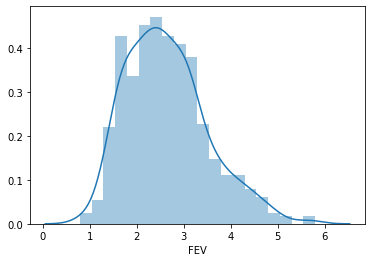

In [96]:
#First step to check if OP data is continuous 

sns.distplot(df['FEV'])

#yes its continuous in nature

In [97]:
out=df['FEV']
inp=df.drop('FEV',axis=1)

In [98]:
inpc=sm.add_constant(inp)

In [99]:
ols=sm.OLS(out,inpc)
olc_mod=ols.fit()
olc_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FEV   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     560.0
Date:                Thu, 10 Dec 2020   Prob (F-statistic):          9.10e-209
Time:                        23:04:40   Log-Likelihood:                -345.90
No. Observations:                 654   AIC:                             701.8
Df Residuals:                     649   BIC:                             724.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.4570      0.223    -20.001      0.000      -4.895      -4.019
Age            0.0655      0.009      6.904      0.000       0.047       0.084
Height         0.1042      0.005     21.901      0.000       0.095       0.114
Gender         0.1571      0.033      4.731      0.000       0.092       0.222
Smoke         -0.0872      0.059     -1.472      0.141      -0.204       0.029
==============================================================================
Omnibus:                       22.758   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.271
Skew:                           0.207   Prob(JB):                     4.02e-10
Kurtosis:                       4.190   Cond. No.                         861.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
#when index column was there it was like this 
ols=sm.OLS(out,inpc)
olc_mod=ols.fit()
olc_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FEV   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     560.0
Date:                Thu, 10 Dec 2020   Prob (F-statistic):          9.10e-209
Time:                        23:04:40   Log-Likelihood:                -345.90
No. Observations:                 654   AIC:                             701.8
Df Residuals:                     649   BIC:                             724.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.4570      0.223    -20.001      0.000      -4.895      -4.019
Age            0.0655      0.009      6.904      0.000       0.047       0.084
Height         0.1042      0.005     21.901      0.000       0.095       0.114
Gender         0.1571      0.033      4.731      0.000       0.092       0.222
Smoke         -0.0872      0.059     -1.472      0.141      -0.204       0.029
==============================================================================
Omnibus:                       22.758   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.271
Skew:                           0.207   Prob(JB):                     4.02e-10
Kurtosis:                       4.190   Cond. No.                         861.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
df.isna().sum()

Age       0
Height    0
Gender    0
Smoke     0
FEV       0
dtype: int64

In [102]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(inp.values,i) for i in range(inp.shape[1])]
vif['feature']=inp.columns
vif.sort_values('VIF',ascending=False)

,VIF,feature
1,24.524524,Height
0,24.322098,Age
2,2.130851,Gender
3,1.342164,Smoke


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. How can we rectify the multicollinearity detected in question 13? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [104]:
# type your code here
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [105]:
vif
#As per analysis Height has little more value when compared to Age.

,VIF,feature
0,24.322098,Age
1,24.524524,Height
2,2.130851,Gender
3,1.342164,Smoke


In [106]:
#As value are close by we are doing correlation

df.corr()['FEV']

Age       0.756459
Height    0.868135
Gender    0.208415
Smoke     0.245425
FEV       1.000000
Name: FEV, dtype: float64

In [108]:
inpv1=inp.drop('Age',axis=1)

In [109]:
inpv1.head()

,Height,Gender,Smoke
0,57.0,0,0
1,67.5,0,0
2,54.5,0,0
3,53.0,1,0
4,57.0,1,0


In [110]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(inpv1.values,i) for i in range(inpv1.shape[1])]
vif['feature']=inpv1.columns
vif.sort_values('VIF',ascending=False)

,VIF,feature
0,2.326514,Height
1,2.125582,Gender
2,1.142476,Smoke


In [111]:
inpv2=inp.drop('Height',axis=1)

In [112]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(inpv2.values,i) for i in range(inpv2.shape[1])]
vif['feature']=inpv2.columns
vif.sort_values('VIF',ascending=False)

,VIF,feature
0,2.307311,Age
1,1.977845,Gender
2,1.238003,Smoke


In [114]:
inpv1_c=sm.add_constant(inpv1)
ols=sm.OLS(out,inpv1_c)
ols_mod=ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FEV   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     681.9
Date:                Thu, 10 Dec 2020   Prob (F-statistic):          3.06e-200
Time:                        23:04:51   Log-Likelihood:                -369.07
No. Observations:                 654   AIC:                             746.1
Df Residuals:                     650   BIC:                             764.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.3621      0.187    -28.743      0.000      -5.728      -4.996
Height         0.1297      0.003     41.756      0.000       0.124       0.136
Gender         0.1276      0.034      3.744      0.000       0.061       0.195
Smoke          0.0341      0.059      0.583      0.560      -0.081       0.149
==============================================================================
Omnibus:                       30.516   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.282
Skew:                           0.220   Prob(JB):                     3.32e-16
Kurtosis:                       4.557   Cond. No.                         689.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. A Linear regression model is used to analyze the impact of all possible features on respiratory function (FEV). How do we check whether or not the model adequately captures the relationship between the response and predictor variables?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [115]:
# type your code here

# relationship between the response and predictor variables? - Linearity between output and predicted op

In [116]:
ypred=ols_mod.predict(inpv1_c)

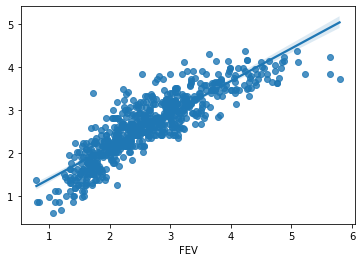

In [117]:
sns.regplot(out,ypred)

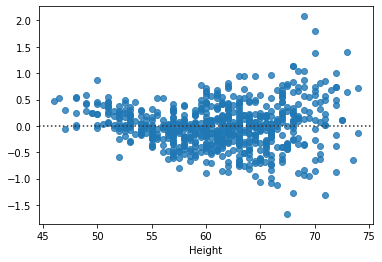

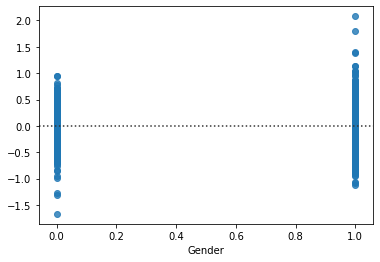

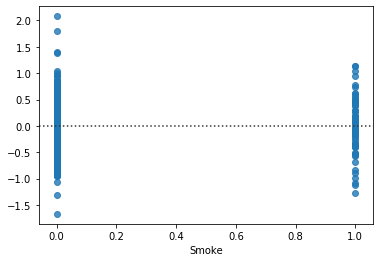

In [118]:
for i in inpv1.columns:
    sns.residplot(inpv1[i],ols_mod.resid)
    plt.show()

In [ ]:
#Statistical method

In [119]:
from statsmodels.stats.diagnostic import linear_rainbow

In [120]:
linear_rainbow(res=ols_mod,frac=0.5) 


(1.0538667324940405, 0.31836725841787145)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16.  A Linear regression model is used to analyze the impact of all possible features on respiratory function (FEV). Check whether the error terms are serially independent?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [121]:
# type your code here

inpv1_c=sm.add_constant(inpv1)
ols=sm.OLS(out,inpv1_c)
ols_mod=ols.fit()
ols_mod.summary()

# Durbin-Watson:1.598 
# which is betwene the thumb rule of 1.5-2.5 acceptable range so we can say that error terms are serially independent

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FEV   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     681.9
Date:                Thu, 10 Dec 2020   Prob (F-statistic):          3.06e-200
Time:                        23:05:37   Log-Likelihood:                -369.07
No. Observations:                 654   AIC:                             746.1
Df Residuals:                     650   BIC:                             764.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.3621      0.187    -28.743      0.000      -5.728      -4.996
Height         0.1297      0.003     41.756      0.000       0.124       0.136
Gender         0.1276      0.034      3.744      0.000       0.061       0.195
Smoke          0.0341      0.059      0.583      0.560      -0.081       0.149
==============================================================================
Omnibus:                       30.516   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.282
Skew:                           0.220   Prob(JB):                     3.32e-16
Kurtosis:                       4.557   Cond. No.                         689.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. A model is built using all the features to predict the FEV. Check whether the residuals obtained form the model are normally distributed. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
# type your code here


In [123]:
ypred=ols_mod.predict(inpv1_c)
ypred

0      2.030416
1      3.392191
2      1.706184
3      1.639288
4      2.158059
         ...   
649    3.489126
650    3.618819
651    2.419495
652    2.842711
653    3.262498
Length: 654, dtype: float64

In [124]:
ols_mod.resid

0     -0.322416
1     -1.668191
2      0.013816
3     -0.081288
4     -0.263059
         ...   
649    0.780874
650    0.108181
651    0.433505
652   -0.047711
653   -0.051498
Length: 654, dtype: float64

In [125]:
ols_mod.resid.skew()

0.2201356870933781

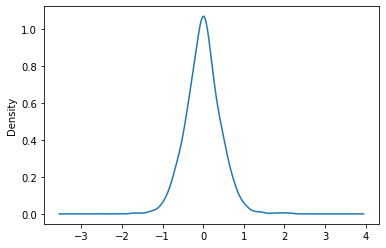

In [126]:
ols_mod.resid.plot(kind='density')
plt.show()

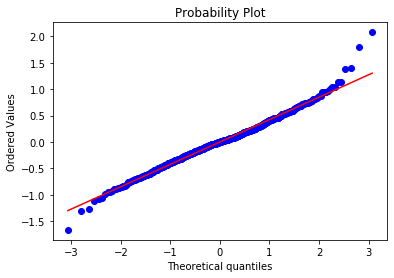

In [127]:
import scipy.stats as stats
stats.probplot(ols_mod.resid,plot=plt)
plt.show()

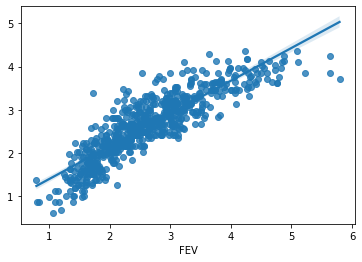

In [128]:
sns.regplot(out,ypred)

<a id="ml_perf"> </a>
## 6. Model Performance

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Consider the full model. Calculate the mean square error and the root mean square error.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [129]:
mse = np.mean((out-ypred)**2) 
mse

0.1810076849388907

In [130]:
rmse=np.sqrt(mse)
rmse

0.4254499793617232

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Calculate the mean absolute error and the  mean absolute percentage error. Compare the values of RMSE and MAE. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [131]:
mae = np.mean(abs(out-ypred)) 
mae

0.32108454522760577

In [132]:
mae_percent= np.mean(abs((out-ypred)/out)) 
mae_percent

0.12797446669789617

In [135]:
np.mean(abs(out-ypred)/out)

0.12797446669789617

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Consider the full model, has the model overfitted? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [139]:
# type your code here

out

0      1.708
1      1.724
2      1.720
3      1.558
4      1.895
       ...  
649    4.270
650    3.727
651    2.853
652    2.795
653    3.211
Name: FEV, Length: 654, dtype: float64

In [141]:
from sklearn.model_selection import train_test_split


In [144]:
xtrain,xtest,ytrain,ytest = train_test_split(inp,out,test_size=0.3) 

xtrainc=sm.add_constant(xtrain) 
ols=sm.OLS(ytrain,xtrainc) 
ols_mod=ols.fit() 
ypred_train=ols_mod.predict(xtrainc) 

xtestc=sm.add_constant(xtest) 
ypred_test= ols_mod.predict(xtestc) 
rmse_train= np.sqrt(np.mean((ytrain - ypred_train)**2)) 
rmse_test= np.sqrt(np.mean((ytest - ypred_test)**2)) 

# deviation between rmse_train and rmse_test is more then my model is overfitted

In [145]:
rmse_train,rmse_test

(0.41033233561670635, 0.41686256097039925)

In [147]:
rmse_train-rmse_test

-0.006530225353692909